<a href="https://colab.research.google.com/github/nebojsa-bozanic/BMI_OSuM/blob/master/Vezba11%3A%20Z-normalizacija%20i%20objektivne%20mere/OSuM_vezba_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82


Laboratorijska vežba 11: Z-normalizacija i objektivne mere

Potrebne biblioteke: cv2, numpy, matplotlib.pyplot, osum, skimage.metrics.structural_similarity

In [ ]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba11/OSuM_Vezba11

fatal: destination path 'OSuM' already exists and is not an empty directory.
/content/OSuM/OSuM_Vezba11/OSuM_Vezba11


In [ ]:
import cv2
import osum
import matplotlib.pyplot as plt
import numpy as np

# 1. Globalna z-normalizacija

1.1 U skripti v11_1.py u promenljivu im1 učitati sliku REG_HE.png, a u promenljivu b učitati sliku REG_LE_X.jpg (izabrati iz skupa). Prikazati ih i zaključiti kako se one razlikuju. Prikazati sliku apsolutnih razlika. Izračunati sumu apsolutnih razlika i apsolutnu razliku srednjih vrednosti slika (razlika prosečnih osvetljaja).

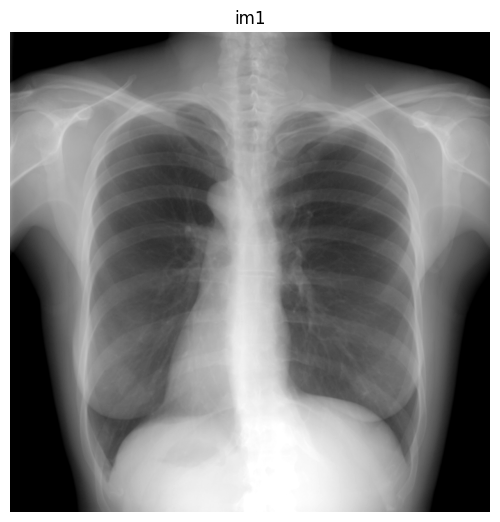

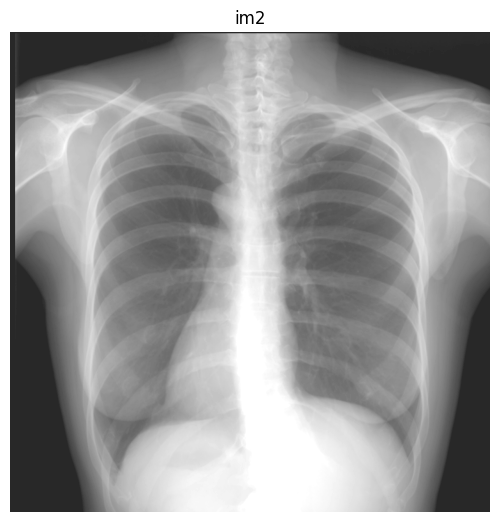

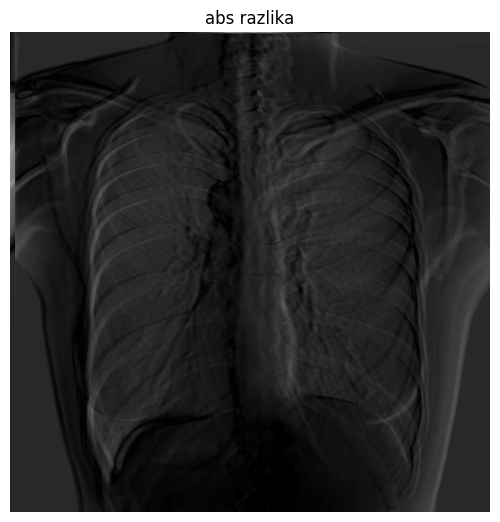

In [ ]:
# 1.1
im1 = cv2.imread('REG_HE.png', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('REG_LE_08.PNG', cv2.IMREAD_GRAYSCALE)

im1_nim1 = np.float32(im1)
im2 = np.float32(im2)
osum.disp_im(im1, title='im1')
osum.disp_im(im2, title='im2')
osum.disp_im(np.abs(im1-im2), title='abs razlika')

d = np.sum(np.sum(np.abs(im1-im2)))
d_mu = np.abs(np.mean(im1)-np.mean(im2))

1.2 Napraviti njihove histograme i prikazati ih na istom grafiku. Po čemu se razlikuju histogrami?

Text(0.5, 1.0, 'Histogrami pre z-normalizacije')

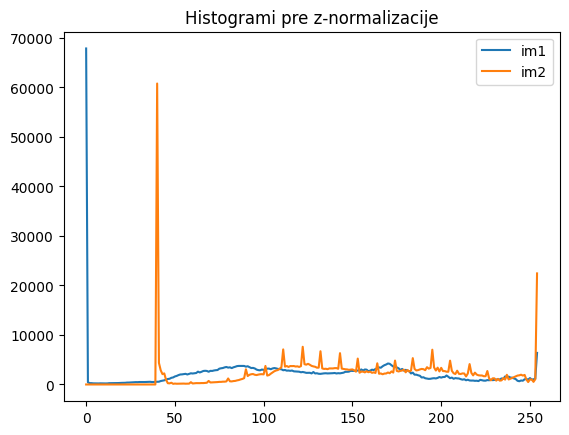

In [ ]:
# 1.2
g = np.arange(0, 256)
h1 = np.histogram(im1, g)
h2 = np.histogram(im2, g)

plt.figure()
plt.plot(g[:-1], h1[0])
plt.plot(g[:-1], h2[0])
plt.legend(['im1', 'im2'])
plt.title('Histogrami pre z-normalizacije')

1.3 Normalizovati slike im1 i im2 tako da im se poklapaju globalne statistike, tj. da srednja vrednost bude 0 a standardna devijacija 1 (globalna z-normalizacija). Srednja vrednost se postavlja na 0 oduzimanjem početne srednje vrednosti od svih piksela. Standardna devijacija se postavlja na 1 deljenjem svakog piksela sa početnom standardnom devijacijom (koja se može računati kao koren iz varijanse).

In [ ]:
# 1.3
im1_n = (im1-np.mean(im1))/np.sqrt(np.var(im1))
im2_n = (im2-np.mean(im2))/np.sqrt(np.var(im2))

1.4 Prikazati slike nakon z-normalizacije. Da li su sada slike sličnije? Kako sada izgleda slika apsolutnih razlika? Koliko iznose srednje vrednosti i standardne devijacije nakon z-normalizacije? Koliko iznosi suma apsolutnih razlika i apsolutna razlika srednjih vrednosti slika?

6.063298011819522e-17
-5.360243e-07
0.9999999999999998
1.0000001


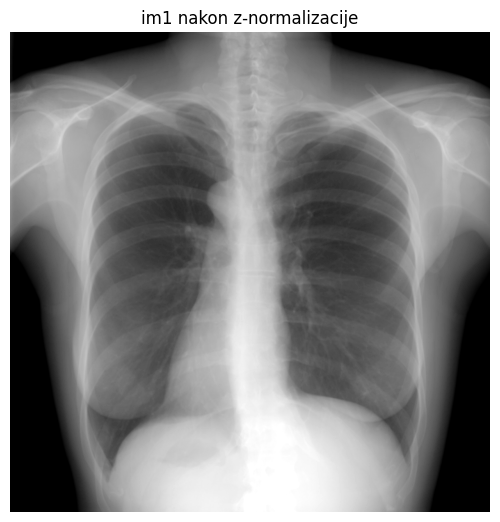

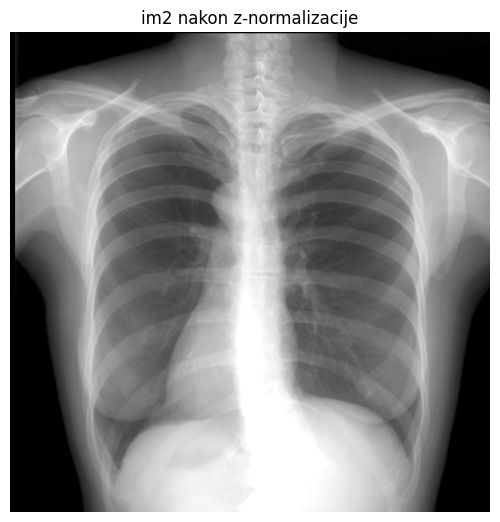

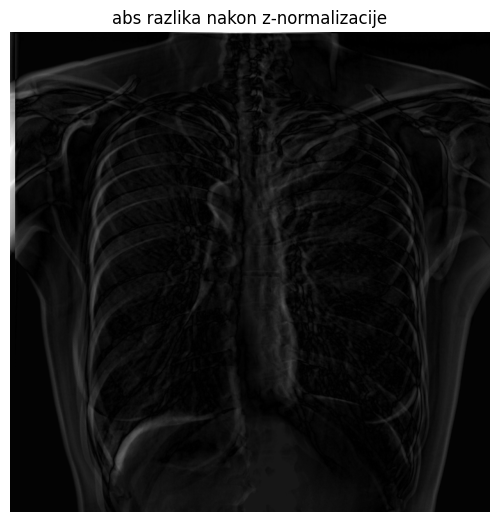

In [ ]:
# 1.4
osum.disp_im(im1_n, title='im1 nakon z-normalizacije', lmin=im1_n.min(), lmax=im1_n.max())
osum.disp_im(im2_n, title='im2 nakon z-normalizacije', lmin=im2_n.min(), lmax=im2_n.max())
abs_n = np.abs(im1_n-im2_n)
osum.disp_im(abs_n, title='abs razlika nakon z-normalizacije', lmin=abs_n.min(), lmax=abs_n.max())

print(np.mean(im1_n))
print(np.mean(im2_n))
print(np.std(im1_n))
print(np.std(im2_n))
d_n = np.sum(np.sum(np.abs(im1_n-im2_n)))
d_mu_n = np.abs(np.mean(im1_n)-np.mean(im2_n))

1.5 Prikazati histograme slika nakon z-normalizacije na istom grafiku. Da li su sada sličniji?

Text(0.5, 1.0, 'Histogrami nakon z-normalizacije')

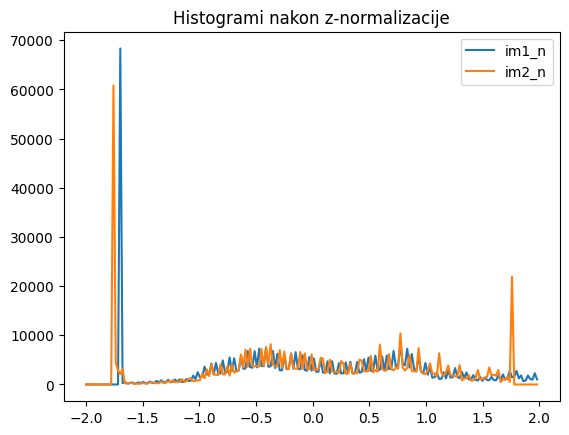

In [ ]:
# 1.5
g = np.linspace(-2, 2, num=200)
h1 = np.histogram(im1_n, g)
h2 = np.histogram(im2_n, g)

plt.figure()
plt.plot(g[:-1], h1[0])
plt.plot(g[:-1], h2[0])
plt.legend(['im1_n', 'im2_n'])
plt.title('Histogrami nakon z-normalizacije')

# 2. Lokalna z-normalizacija

Preko Gausovog filtra
2.1 U skripti osum.py napraviti funkciju z_norm koja radi lokalnu z-normalizaciju (ujednačava statistiku po lokalnim regionima slike). Ulazni parametri funkcije su slika, dužina Gausovog filtra d, standardna devijacija filtra s i prag za varijansu pr. Izlaz je slika nakon lokalne z-normalizacije.
Prvo je potrebno izračunati lokalnu srednju vrednost slike. Slika isfiltrirana Gausovim filtrom predstavlja procenu lokalne srednje vrednosti, tj. srednje vrednosti u regionu koji obuhvata filtar oko svakog piksela. Od originalne slike oduzeti ovako napravljenu sliku lokalne srednje vrednosti.

Globalna varijansa se računa kao var(X) = E[(X – μ)2], gde je E[X] srednja vrednost X. Lokalna varijansa se računa tako što se od slike oduzme lokalna srednja vrednost, zatim se rezultat kvadrira i računa se lokalna srednja vrednost od tog kvadrata pomoću Gausovog filtra. Z-normalizacija podrazumeva deljenje sa standardnom devijacijom (korenom iz varijanse), što može biti problematično kada je ta vrednost jako mala ili čak 0 (šum na pozadini koji ima malu std). Zbog toga je potrebno ograničiti varijansu da ne pada ispod određenog praga pr.Lokalna z-normalizacija se radi tako što se od slike oduzme lokalna srednja vrednost i podeli se sa lokalnom standardnom devijacijom koja se računa kao koren iz lokalne varijanse.

2.2 Primeniti funkciju z_norm na slike im1 i im2 i prikazati ih. Isprobati različite vrednosti parametara. Kako izgledaju lokalno z-normalizovane slike u odnosu na originalne i globalno z-normalizovane? Kako različiti parametri i njihove kombinacije utiču na izgled slika? Prikazati sliku apsolutnih razlika i uporediti je sa slikom apsolutnih razlika pre z-normalizacije i nakon globalne z-normalizacije.

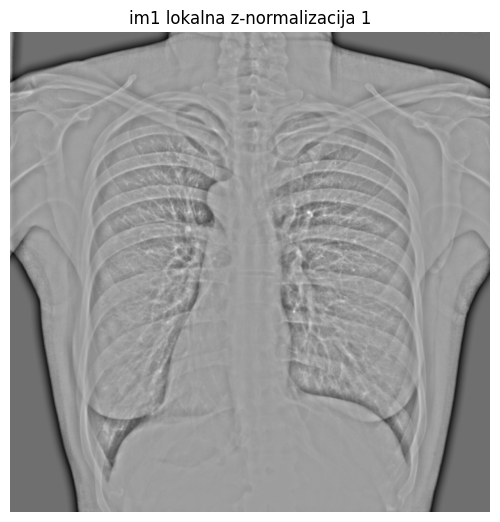

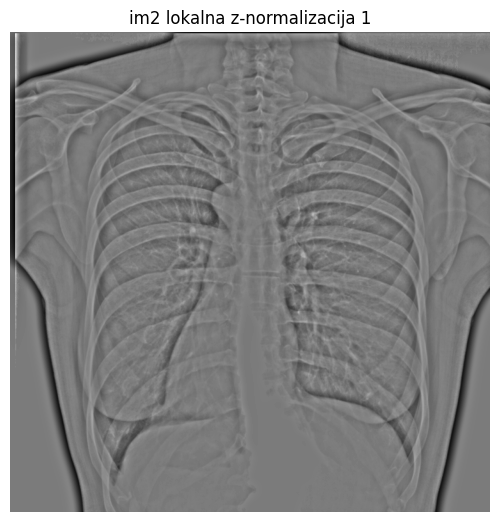

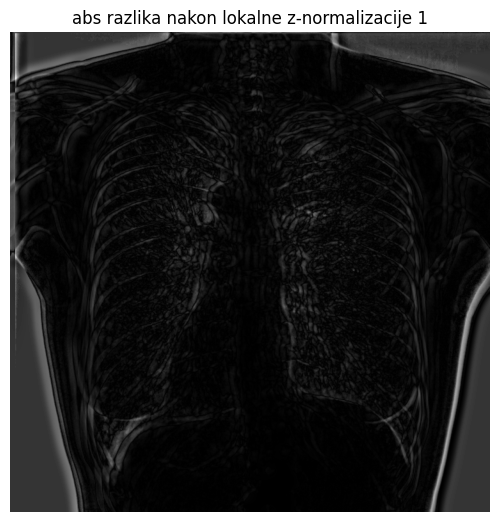

In [ ]:
# 2.2
im1_n_lok1 = osum.z_norm(im1)
im2_n_lok1 = osum.z_norm(im2)

# imz1 = osum.z_norm(im1, d=55, s=10)
# imz2 = osum.z_norm(im1, d=11, s=2)
# imz3 = osum.z_norm(im1, d=21, s=5)
# osum.disp_im(imz1, title='d=55, s=10', lmin=imz1.min(), lmax=imz1.max())
# osum.disp_im(imz2, title='d=11, s=2', lmin=imz2.min(), lmax=imz2.max())
# osum.disp_im(imz3, title='d=21, s=5', lmin=imz3.min(), lmax=imz3.max())
# plt.show()

osum.disp_im(im1_n_lok1, title='im1 lokalna z-normalizacija 1', lmin=im1_n_lok1.min(), lmax=im1_n_lok1.max())
osum.disp_im(im2_n_lok1, title='im2 lokalna z-normalizacija 1',lmin=im2_n_lok1.min(), lmax=im2_n_lok1.max())
abs_n_lok1 = np.abs(im1_n_lok1-im2_n_lok1)
osum.disp_im(abs_n_lok1, title='abs razlika nakon lokalne z-normalizacije 1', lmin=abs_n_lok1.min(), lmax=abs_n_lok1.max())


2.3 Koliko iznosi globalna srednja vrednost i standardna devijacija slika? Koliko iznosi suma apsolutnih razlika između slika i apsolutna razlika srednjih vrednosti? Da li je manja ili veća nego između globalno z-normalizovanih slika? Zbog čega je došlo do promene? Preko integralnih slika

In [ ]:
# 2.3
print(np.mean(im1_n_lok1))
print(np.mean(im2_n_lok1))
print(np.std(im1_n_lok1))
print(np.std(im2_n_lok1))

d_n_lok1 = np.sum(np.sum(np.abs(im1_n_lok1-im2_n_lok1)))
d_mu_n_lok1 = np.abs(np.mean(im1_n_lok1)-np.mean(im2_n_lok1))

0.8494831
1.0169932
0.54468226
0.31843185


2.4 Za računanje lokalne srednje vrednosti mogu se koristiti integralne slike. Piksel u integralnoj slici predstavlja sumu intenziteta piksela koji se nalaze gore i levo od njega. U skriptu osum.py napraviti funkciju integral_img koja za datu ulaznu sliku pravi njenu integralnu sliku. Slika 1. Piksel u integralnoj slici predstavlja sumu regiona iznad i levo od njega. Različitim bojama je objašnjeno indeksiranje u z_norm2 (2.5)

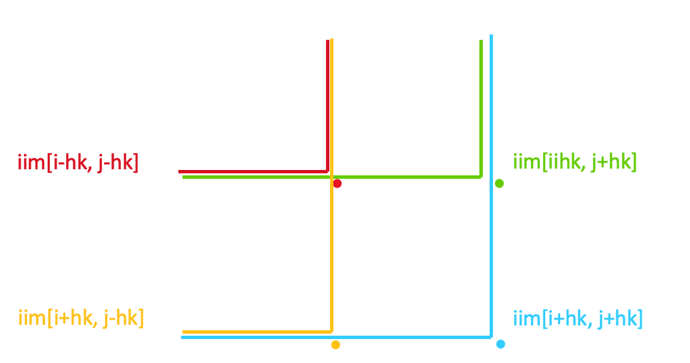

Slika 1. Piksel u integralnoj slici predstavlja sumu regiona iznad i levo od njega. Različitim bojama je objašnjeno indeksiranje u z_norm2 (2.5)

2.5 U skriptiosum.py napraviti funkciju z_norm2 koja radi lokalnu z-normalizaciju koristeći integralne slike za računanje lokalne srednje vrednosti. Suma lokalnog regiona može se izračunati pomoću 4 piksela (ćoškovi regiona) u integralnoj slici i operacija sabiranja i oduzimanja. Srednja vrednost dobija se deljenjem sume sa brojem elemenata, što je određeno veličinom regiona k (ulazni parametar funkcije).

2.6 Primeniti funkciju z_norm na slike im1 i im2 i prikazati ih. Kako izgledaju lokalno z-normalizovane slike u odnosu na originalne i globalno z-normalizovane?

2.7 Koliko iznosi globalna srednja vrednost i standardna devijacija slika? Koliko iznosi suma apsolutnih razlika između slika i apsolutna razlika srednjih vrednosti? Da li je manja ili veća nego između globalno z-normalizovanih slika? Zbog čega je došlo do promene?

/content/OSuM/OSuM_Vezba11/OSuM_Vezba11/osum.py:506: RuntimeWarning: overflow encountered in ulong_scalars
  mean_im[i, j] = (iim[i+hk,j+hk]-iim[i-hk,j+hk]-iim[i+hk,j-hk]+iim[i-hk,j-hk])/k**2
/content/OSuM/OSuM_Vezba11/OSuM_Vezba11/osum.py:507: RuntimeWarning: overflow encountered in ulong_scalars
  var_im[i, j] = (sqiim[i+hk,j+hk]-sqiim[i-hk,j+hk]-sqiim[i+hk,j-hk]+sqiim[i-hk,j-hk])/k**2-mean_im[i, j]**2


3.4038382
0.23158772
3.4539397
0.17781968


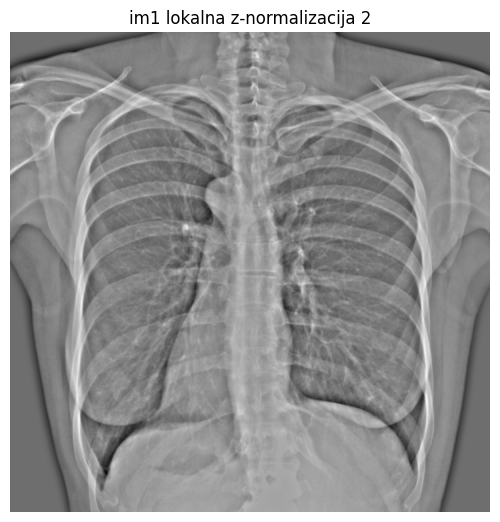

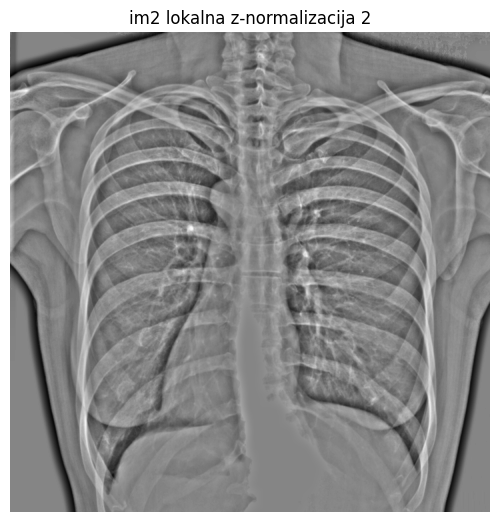

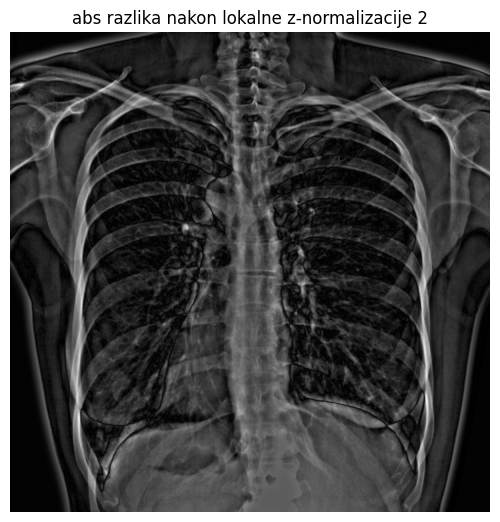

In [ ]:
# 2.6
im1_n_lok2 = osum.z_norm2(im1)
im2_n_lok2 = osum.z_norm2(im2)
osum.disp_im(im1_n_lok2, title='im1 lokalna z-normalizacija 2', lmin=im1_n_lok2.min(), lmax=im1_n_lok2.max())
osum.disp_im(im2_n_lok2, title='im2 lokalna z-normalizacija 2',lmin=im2_n_lok2.min(), lmax=im2_n_lok2.max())
osum.disp_im(np.abs(im1_n_lok2-im2_n_lok2), title='abs razlika nakon lokalne z-normalizacije 2', lmin=np.abs(im1_n_lok2-im2_n_lok2).min(), lmax=np.abs(im1_n_lok2-im2_n_lok2).max())

print(np.mean(im1_n_lok2))
print(np.mean(im2_n_lok2))
print(np.std(im1_n_lok2))
print(np.std(im2_n_lok2))
d_n_lok2 = np.sum(np.sum(np.abs(im1_n_lok2-im2_n_lok2)))
d_mu_n_lok2 = np.abs(np.mean(im1_n_lok2)-np.mean(im2_n_lok2))

In [ ]:
from skimage.metrics import structural_similarity as ssi

# 3. Objektivne mere

3.1 U skripti v11_2.py učitati 3 proizvoljne mr_0x.png slike u promenljive im1, im2 i im3.

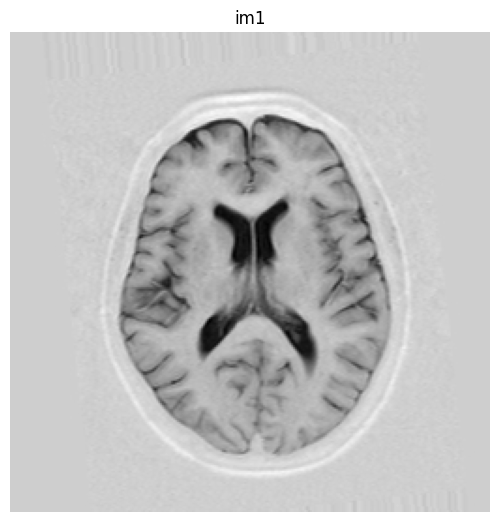

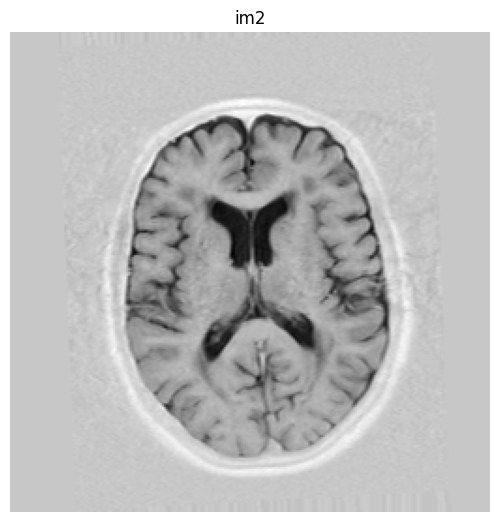

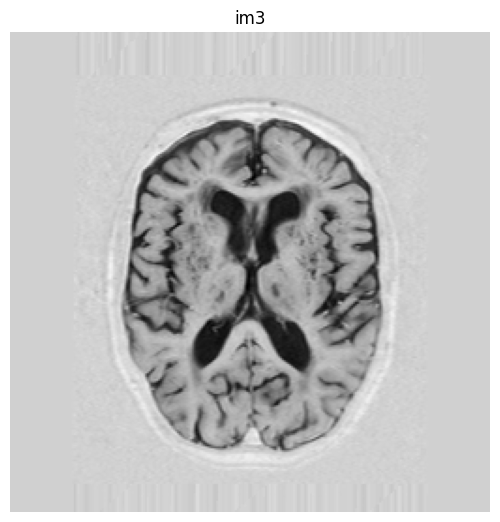

In [ ]:
# 3.1
im1 = cv2.imread('mr_glava_1.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('mr_glava_10.jpg', cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread('mr_glava_5.jpg', cv2.IMREAD_GRAYSCALE)
osum.disp_im(im1, title='im1')
osum.disp_im(im2, title='im2')
osum.disp_im(im3, title='im3')

3.2 Izračunati sumu kvadrata razlika između im1 i im2, a zatim između im1 i im3. Koja slika je sličnija slici im1? Izračunati i sumu kvadrata razlika po pikselu.

In [ ]:
# 3.2
ssd1 = np.sum(np.sum((im1-im2)**2))
ssdp1 = ssd1/im1.size
ssd2 = np.sum(np.sum((im1-im3)**2))
ssdp2 = ssd2/im1.size

3.3 Izračunati sumu apsolutnih razlika između im1 i im2, a zatim između im1 i im3. Koja slika je sličnija slici im1? Izračunati i sumu apsolutnih razlika po pikselu. Kako se rezultati razlikuju od sume kvadrata razlika?

Text(0, 0.5, 'im2')

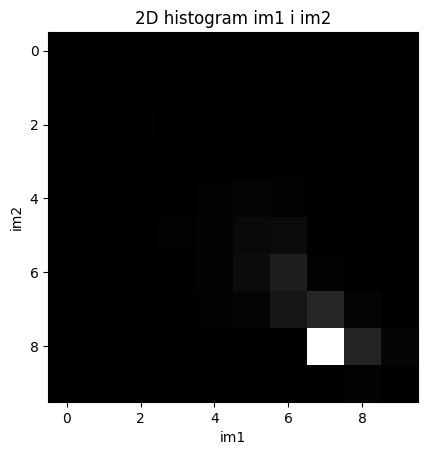

In [ ]:
# 3.3
sabs1 = np.sum(np.sum(np.abs(im1-im2)))
sabsp1 = sabs1/im1.size
sabs2 = np.sum(np.sum(np.abs(im1-im3)))
sabsp2 = sabs2/im1.size

# 2D histogram
h2d, xedges, yedges = np.histogram2d(np.reshape(im1, -1), np.reshape(im2, -1), bins=10)
plt.figure()
plt.imshow(h2d, cmap='gray', vmin=h2d.min(), vmax=h2d.max())
plt.title('2D histogram im1 i im2')
plt.xlabel('im1')
plt.ylabel('im2')

3.4 U skripti osum.py napraviti funkciju mutual_information koja implementira zajedničke informacije između slika (mera sličnosti), po formuli

\begin{align}
MI(X, Y) = \sum \sum p(X, Y) \log \frac{p(X, Y)}{p(X)p(Y)} ,
\end{align}

pri čemu 𝑝(𝑋, 𝑌) je združena verovatnoća X i Y (normalizovani 2D histogram slika X i Y), a 𝑝(𝑋), 𝑝(𝑌) marginalne verovatnoće po X i Y. Računati samo nenulte odbirke u 2D histogramu.

3.5 U promenljive im4 i im5 učitati slike 2_CT.png i 2_PET.png. Izračunati zajedničke informacije između ovih slika. Ponoviti postupak sa invertovanom slikom im4. Uporediti sa rezultatima koji se dobijaju sa nekom od statističkih mera, npr. sumom apsolutnih razlika. Da li zajedničke informacije mere statističku ili strukturnu sličnost?

3.6 U skripti osum.py napraviti funkciju normalized_mutual_information u kojoj se implementira mera normalizovane zajedničke informacije, po formuli

\begin{align}
NMI(X,Y) = 1 - \frac{MI(X, Y)}{\max(H(X),H(Y))},
\end{align}

gde su 𝐻(𝑋), 𝐻(𝑌) entropije slika X i Y.


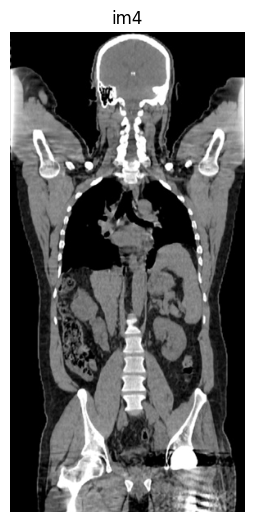

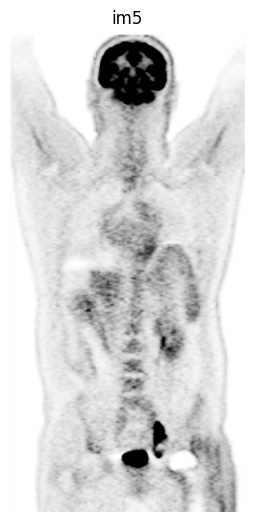

In [ ]:
# 3.5
im4 = cv2.imread('2_CT.png', cv2.IMREAD_GRAYSCALE)
im5 = cv2.imread('2_PET.png', cv2.IMREAD_GRAYSCALE)
osum.disp_im(im4, title='im4')
osum.disp_im(im5, title='im5')
plt.show()

mi1, hx1, hy1 = osum.mutual_information(im4, im5, 20)
mi2, hx2, hy2 = osum.mutual_information(im4, 255-im5, 20)

sabs11 = np.sum(np.abs(im4-im5))
sabsp11 = sabs11/im4.size
sabs22 = np.sum(np.abs(im4-(255-im5)))
sabsp22 = sabs22/im4.size

3.7 Izračunati normalizovane zajedničke informacije između slika im4 i im5. Ponoviti postupak sa invertovanom slikom im5. Uporediti sa rezultatima koji se dobijaju sa nekom od statističkih mera, npr. sumom apsolutnih razlika. Da li normalizovane zajedničke informacije mere statističku ili strukturnu sličnost?

In [ ]:
# 3.7
nmi1 = osum.normalized_mutual_information(im4, im5, 20)
nmi2 = osum.normalized_mutual_information(im4, (255-im5), 20)

3.8 Pronaći indeks strukturne sličnosti slika im1 i im2, a zatim im2 i im3. Koja slika je sličnija im1? Prikazati slike lokalnih sličnosti za obe kombinacije i izanalizirati ih. Da li su slike slične po kriterijumu koji koristi ova mera?

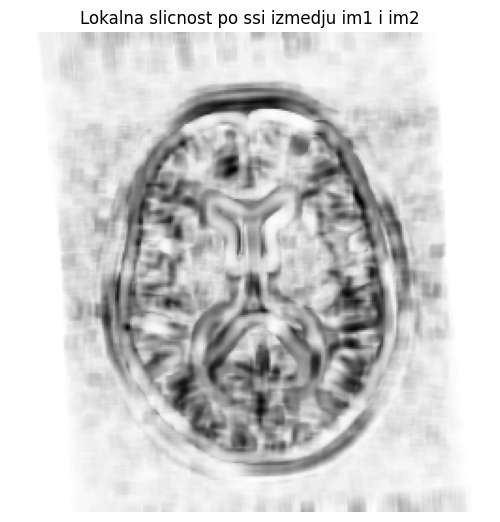

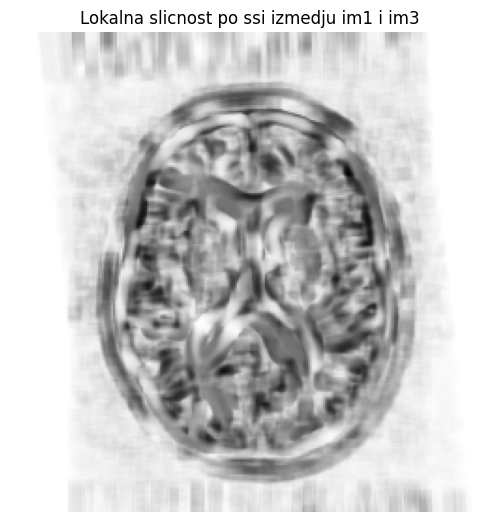

In [ ]:
# 3.8
ssi1, lok_sl1 = ssi(im1, im2, full=True)  # full=True - da se kao izlaz racuna i slika lokalne slicnosti
ssi2, lok_sl2 = ssi(im1, im3, full=True)
osum.disp_im(lok_sl1, lmin=lok_sl1.min(), lmax=lok_sl1.max(), title='Lokalna slicnost po ssi izmedju im1 i im2')
osum.disp_im(lok_sl2, lmin=lok_sl2.min(), lmax=lok_sl2.max(), title='Lokalna slicnost po ssi izmedju im1 i im3')

3.9 Izračunati gradijentnu meru QAB koristeći funkciju osum.imq_qab između slika im1 i im2. Prikazati sliku lokalnih sličnosti qab_im i mapu značaja w. Da li su slike slične po kriterijumu koji koristi ova mera?

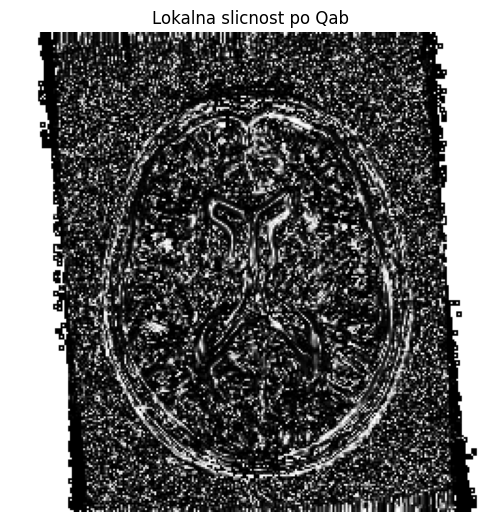

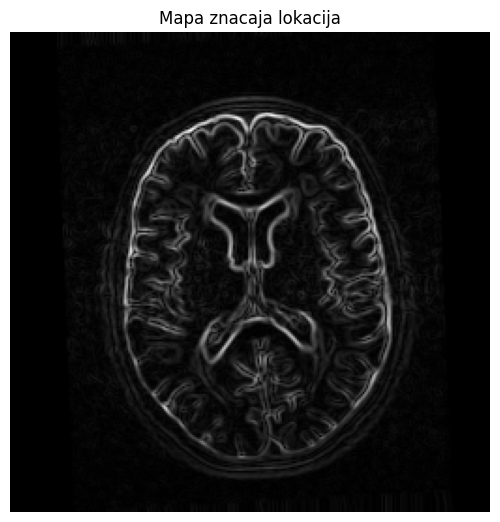

In [ ]:
# 3.9
qab, qab_im, w = osum.imq_qab(im1, im2)
osum.disp_im(qab_im, lmin=qab_im.min(), lmax=qab_im.max(), title='Lokalna slicnost po Qab')
osum.disp_im(w, lmin=w.min(), lmax=w.max(), title='Mapa znacaja lokacija')